### Stop Words

In [1]:
import nltk

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
stop = stopwords.words('english')
stop[:5]

['i', 'me', 'my', 'myself', 'we']

### Zipf's Law

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Text(0, 0.5, 'Frequency')

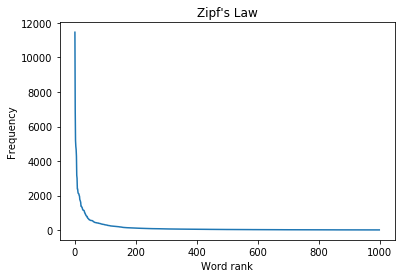

In [4]:
%matplotlib inline
nltk.download('gutenberg')
import nltk
import collections
import matplotlib.pyplot as plt
words = nltk.corpus.gutenberg.words('austen-emma.txt')
fd = collections.Counter(words)
data = sorted([fd[k] for k in fd],reverse=True)
plt.plot(data[:1000])
plt.title("Zipf's Law")
plt.xlabel("Word rank")
plt.ylabel("Frequency")

# Vectors and Matrices in Python

### Manipulating Vectors

In [5]:
import numpy as np
a = np.array([1,2,3,4])
a[0]

1

In [6]:
a[1:3]

array([2, 3])

In [7]:
a+1

array([2, 3, 4, 5])

In [8]:
b = np.array([2,3,4,5])
a+b

array([3, 5, 7, 9])

In [9]:
np.dot(a,b)

40

### Manipulating Matrices

In [10]:
x = np.array([[1,2,3],[4,5,6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
y = np.array([[1,1,1],[2,2,2]])
x+y

array([[2, 3, 4],
       [6, 7, 8]])

In [12]:
x*y

array([[ 1,  2,  3],
       [ 8, 10, 12]])

In [13]:
x.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
np.dot(x.T,y)

array([[ 9,  9,  9],
       [12, 12, 12],
       [15, 15, 15]])

# Scikit-learn
In the following code, `tfidf` is an instance of the `TfidfVectorizer` class, which
will accept a list of text files and will ignore stop words. 

The tf.idf values are calculated and stored in the variable
`tfidf_values`. This is done by calling the method `fit_transform`,
which will return a sparse matrix. Scikit-learn provides many
functions that operate with sparse matrices, so often we will not need
to convert sparse matrices to regular arrays. If we need to convert a
sparse matrix to an array we can use the `toarray` method.

The method `shape` returns the dimensions of the array or sparse
matrix. In our case, the output of the function says that the variable
`tfidf_values` has 3,672 rows (one row per file) and 19892
columns (one column per distinct word).

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import zipfile

In [16]:
import os.path
if not os.path.exists('enron1'):
    with zipfile.ZipFile('enron1.zip') as myzip:
        myzip.extractall()

In [17]:
import glob
files = glob.glob('enron1/ham/*.txt')
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(input='filename',stop_words='english')
tfidf_values = tfidf.fit_transform(files)
len(tfidf.get_feature_names())


19891

In [18]:
tfidf.get_feature_names()[10000:10005]

['grandpa', 'grandsn', 'grandsons', 'grant', 'granted']

In [19]:
type(tfidf_values)

scipy.sparse.csr.csr_matrix

In [20]:
type(tfidf_values.toarray())

numpy.ndarray

In [21]:
tfidf_values.shape

(3672, 19891)

In [22]:
len(files)

3672

### Normalised tf.idf and cosine similarity

In [23]:
import numpy as np
tfidf_norm = TfidfVectorizer(input='filename',
                             stop_words='english',
                             norm='l2')
tfidf_norm_values = tfidf_norm.fit_transform(files).toarray()

In [24]:
def cosine_similarity(X,Y):
    return np.dot(X,Y)

Note that the first character of `l2` is lowercase L and not the number 1. 

In [25]:
cosine_similarity(tfidf_norm_values[0,:],
                  tfidf_norm_values[1,:])

0.017317648885111028

The following code shows an alternative way to compute the cosine similarity between two vectors. The sklearn package provides a `cosine_similarity` module that performs the pairwise cosine similarities between the vectors of two lists. The function returns a matrix of cosine similarities where element ($i$,$j$) is the cosine similarity between vector $i$ of the first list, and vector $j$ of the second list. The function does not work with sparse matrices so you need to convert them to numpy arrays.

We can see that the cosine similarity between tfidf vectors is the same as the cosine similarity between normalised tfidf vectors.

In [26]:
from sklearn.metrics import pairwise
pairwise.cosine_similarity([tfidf_norm_values[0,:]],
                           [tfidf_norm_values[1,:]])

array([[0.01731765]])

In [27]:
pairwise.cosine_similarity([tfidf_values[0,:]],
                           [tfidf_values[1,:]])

ValueError: setting an array element with a sequence.

In [28]:
dense_tfidf_values = tfidf_values.toarray()
pairwise.cosine_similarity([dense_tfidf_values[0,:]],
                           [dense_tfidf_values[1,:]])

array([[0.01731765]])

In [29]:
pairwise.cosine_similarity([tfidf_norm_values[0,:]],
                           [tfidf_norm_values[1,:]])

array([[0.01731765]])